# 빅데이터개론2 2022F 과제 7

**제출기한 : 2022년 12월 12일 23시 59분**

각 문제를 읽고 주어진 코드셀에 제시된 변수에 결과를 입력하거나, 주어진 셀에 프로그램 코드 또는 답안을 입력하여 제출하세요.  


아래는 필요한 라이브러리를 불러오는 코드셀입니다. 반드시 숙제를 시작할 때 먼저 실행시키고 문제에서 적절하게 이용하세요.


In [23]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,5)

In [25]:
import math
import numpy as np
import pandas as pd
from itertools import product, combinations

**다음은 과제의 수행과 제출에 대한 안내입니다.**

- 빅데이터개론2 과제는 모두 Colab의 공유 기능을 이용하여 제출하게 됩니다. 자세한 제출방법은 강의시간(또는 동영상)에 알려줄 것입니다.

- 제출시 노트북의 이름(화일명)에서 성명과 학번을 자신의 이름과 학번으로 바꾼 후에 제출해야 합니다. (예: `빅데이터개론2_2022F_과제_07_홍길동-12345677.ipynb`) 

- 답을 입력하는 셀에 있는 `...`는 지우고 답을 입력하세요.

- **과제 노트북은 답을 제시하는 코드셀이나 텍스트셀 이외의 내용 또는 순서를 변경하지 마세요.**



## 1. 상대위험

결핵(tuberculosis)은 결핵균이 침입하여 발생하는 질병이며 호흡기 분비물로 옮겨지는 전염성 질환이다.

1999년 미국 사우스캐롤라이나의 한 교도소에서 A 건물에 수감된 재소자 157 명중에 28명이 결핵에 감염되었다. 멀리 떨어져 있는 B 건물에서는 137명 중에 15명이 감염된 것으로 나타났다.

|      |  결핵의   |유무  | |
|:---:|:---:|:---:|:---:|
| 건물  | 유   |  무  | 합계 |
| A    | 28 |  129 | 157 |
| B    | 15 |  122 | 137 |
|합계   | 43 |  251 | 294 | 


일반적으로 교도소 내에서는 결핵 환자가 때때로 발생하는 하는 경우가 있다.  

**교도소의 의무관은 A 건물에서 발생한 결핵 환자의 비율이 B 건물에서 발생한 환자의 비율보다 유의하게 큰 것인지 파악하고 싶다.**



일반적으로 의학 연구에서 두 집단을 고려하고 질병의 발생 비율을 비교할 때 가장 많이 사용되는 측도는 상대위험(relative risk; RR)이다.

두 개의 집단에서  질병의 발생 비율을 각각 $p_1$, $p_2$ 라고 하면 
상대위험은 다음과 같이 정의된다.

$$ \text{RR} = \frac{p_1}{p_2} $$

위의 1999년 미국 교도소의 예에서  A 건물과 B 건물에 대한 결핵의 발생율을 각각 $p_A$, $p_B$라고 하면 상대위험으로 나타내면 다음과 같다.

$$ \text{RR} = \frac{p_A}{p_B} = \frac{28/157}{15/137} = 1.63$$

상대위험이 1.63 이라는  것은 건물 A 에서 재소자가 결핵에 감염될 위험이 건물 B 보다 1.63 배 높다는 것을 의미한다. 

In [26]:
p_A = 28/157
p_B = 15/137
RR = p_A / p_B
RR 

1.6288747346072185

우리가 흔히 접하는 흡연자가 비흡연자보다 폐질환에 걸릴 위험이 몇 배 높다든지, 과도한 음주를 하면 심장병의 위험이 몇 배 높다는 연구의 결과들은 대부분 상대위험을 의미하는 것이다. 

**문제 1**

만약 A 건물과 B 건물에서 결핵이 발생할 확률이 같다면 전체 교도소에 대한 결핵의 발생 비율은 얼마인가? 전체 교도소에 대한 결핵의 발생 비율을 `p_0`에 저장하는 파이썬 코드를 작성하시오.

$$ p_A = p_B = p_0 $$

In [27]:
p_0 = 43 / 294
p_0

0.14625850340136054

**문제 2** 

교도소의 수감된 재소자가 결핵에 걸릴 사건은 서로 독립이라고 가정하자. 또한 한 명의 재소자가 결핵에 걸릴 확률은 앞 문제 1번에서 계산한 `p_0`라고 가정하자.

이러한 가정에서 A 건물에서 생활하는 재소자 157 명 중에 결핵에 걸린 사람의 수를 $X$라고 하면 확률변수 $X$는 다음과 같은 이항분포를 따른다.

$$ X \sim B(157, p_0) $$

시행의 횟수가 157이고 성공의 확률이 $p_0$인 이항분포에서 성공의 회수 $X$ 를 임의로 추출하여 변수 `x` 저장에 저장하는 파이썬 코드를 작성하시오 

HINT: 시행의 횟수가 `n` 이고 성공의 확률이 `p` 인 이항분포에서 성공의 회수 하나를 임의로 추출하는 함수는 `np.random.binomial(n, p, size= 1)` 이다.

In [28]:
x = np.random.binomial(157, p_0, size = 1)
x

array([19])

**문제 3** 

B 건물에서 생활하는 재소자 137 명 중에 결핵에 걸린 사람의 수를 $Y$라고 하면 확률변수 $Y$도 이항분포를 따른다. 시행의 횟수가 137이고 성공의 확률이 `p_0` 인 이항분포에서 성공의 회수 $Y$ 를 임의로 추출하여 변수 `y` 저장에 저장하는 파이썬 코드를 작성하시오

In [29]:
y = np.random.binomial(137, p_0, size = 1)
y

array([21])

**문제 4**

이제 문제 2,3 번에서 임의로 얻은 A 건물에서의 결핵에 걸린 재소자의 수 `x`와  B 건물에서의 결핵에 걸린 재소자의 수 `y` 를 이용하여 상대위험을 계산하여 변수 `rr` 에 저장하는 파이썬코드를 작성하시오.


In [30]:
rr = (x/157)/(y/137)
rr

array([0.78950561])

**문제 5**

문제 2,3,4 에서 가정한 $X$ 와 $Y$ 분포와 파이썬 코드를 이용하여  상대위험을 랜덤하게 B=5000번 모의실험으로 추출하고 `numpy` 벡터  `rr_sim` 에 저장하는 파이썬 코드를 작성히시오, 

In [31]:
B = 5000
rr_sim = np.array([])

for i in np.arange(B):
  rr = (np.random.binomial(157, p_0, size = 1) / 157)/ (np.random.binomial(137, p_0, size = 1) / 137)
  rr_sim = np.append(rr_sim, rr)

rr_sim

array([1.05631914, 0.69808917, 0.87261146, ..., 0.74171975, 1.09076433,
       1.21196037])

**문제 6**

이제 교도소의 의무관은 다음과 같은 가설에 대하여 유의성 검정을 실시하고자 한다.

$$ H_0: \frac{p_A}{p_B} =1  $$ 

문제 5 에서 모의실험으로 구한 B= 5000개 상대위험의 자료를 이용하여 유의성 검정을 위한 p-값을 구하는 파이썬 코드를 작성하시오. 또한 유의성 검정의 결과를 설명하시오.

In [32]:
p_value = np.sum(rr_sim >= RR) / B
p_value

0.053

문제 5 답안

p_value = 0.053이고, 0.053 > 0.05이다.

따라서 유의수준 5%하에서 귀무가설을 기각하지 못하고, 이는 상대위험이 1이라는 것을 기각할 충분한 근거가 없음을 의미한다.

이는 A 건물에서의 결핵의 발생 확률이 B 건물에서의 결핵의 발생 확률과 같음을 의미한다.

p_value = 0.053이고, 0.053 < 0.1이다.

따라서 유의수준 10%하에서 귀무가설을 기각할 수 있고, 이는 상대위험이 1이라는 것을 기각할 충분한 근거가 있음을 의미한다.

## 2. 품질 관리

A 시멘트 공장은 2개의 생산라인에서 제품을 생산하고 있다. 품질 관리를 담당하는 연구원은 생산된 시멘트가 생산 라인에 관계없이 품질이 균일한지를 알기 위하여 간단한 실험을 실시하였다.

다음 자료는 각 생산 라인 `line` 에서 임의로 각각 10개의 시멘트 제품을 추출하여 인장 강도 `strength` 를 측정한 자료이다.    


In [33]:
url = "https://ilovedata.github.io/teaching/bigdata2/data/cement.csv"
df_cement  = pd.read_csv(url, delim_whitespace=True, encoding = 'utf-8-sig')
df_cement

,line,strength
0,line1,18.9
1,line1,19.4
2,line1,17.2
3,line1,18.4
4,line1,18.5
5,line1,17.0
6,line1,19.0
7,line1,17.2
8,line1,16.6
9,line1,19.6


데이터프레임에서 두 그룹의 편균의 차이를 구하는 함수 `diff_mean`는 다음과 같이 정의할 수 있다. 

In [34]:
def diff_mean(df, group_label, treatments):
    """ 
    데이터프레임을 받아서 두 그룹 평균의 차이를 계산해 주는 함수이다.
        df: 데이터프레임
        group_label : 처리명이 저장된 열이름
        treatments : 비교하고 싶은 두 개의 처리명 [A, B] (벡터 또는 리스트 형식)
    결과 : A 그룹의 평균 - B 그룹의 평균
    """
    temp = df.groupby(by=group_label).mean().reset_index()
    return float(temp.loc[temp[group_label] == treatments[0]].strength) - float(temp.loc[temp[group_label] == treatments[1]].strength)

**문제 1**

두 생산 라인의 시멘트 인장 강도의 평균의 차이를 계산하여 `strength_diff` 에 저장하는 파이썬 코드를 작성하시오.

$$ \text{strength_diff} = \bar x_{line1} - \bar x_{line2} $$

HINT: 위에서 정의된 함수 `diff_mean`를 이용할 수 있다.

In [35]:
strength_diff = diff_mean(df_cement, 'line', ['line1', 'line2'])
strength_diff

1.129999999999999

**문제 2**

임의순열 방법(random permutation method)을 사용하여 두 생산라인의 시멘트 인장 강도의 평균이 같은지 유의성 검정을 수행하려고 한다. 

유의성 검정을 위한 p-값을 계산하는 파이썬 코드를 작상하시오.

-  임의순열 방법에서 모의 실험의 횟수는 B=5000 으로 하시오. 


In [36]:
B = 5000
test_stat_permuted = pd.DataFrame({"test_stat":np.zeros(B)})

line = df_cement.line

for i in np.arange(B): 
    random_cement_line = line.sample(frac=1.0, replace=False).reset_index(drop=True) 
    cement_permuted = df_cement
    cement_permuted["permuted_line"] = random_cement_line
    test_stat_permuted.loc[i, "test_stat"] = diff_mean(cement_permuted, "permuted_line", ["line1", "line2"])

p_value = np.sum(test_stat_permuted.test_stat >= strength_diff) / B
p_value 

0.0032

**문제 3**

문제 2에서 구한 p-값을 이용하여 유의상 검정의 결과를 간략하게 설명하시오.

문제 3 답안:

p_value = 0.0032 < 0.05 이므로 유의수준 5% 하에서 귀무가설을 기각할 수 있다.
 이는 두 시멘트 인장 강도의 평균이 같지 않음을 의미하는 것이다. 즉, 두 그룹의 평균의 차이가 유의미함을 의미한다.

**문제 4**

문제 2 에서 임의순열 방법의 모의실험으로 구한 검정통계량의 분포를 히스토그램으로 나타내는 파이썬 코드를 작상하시오.  

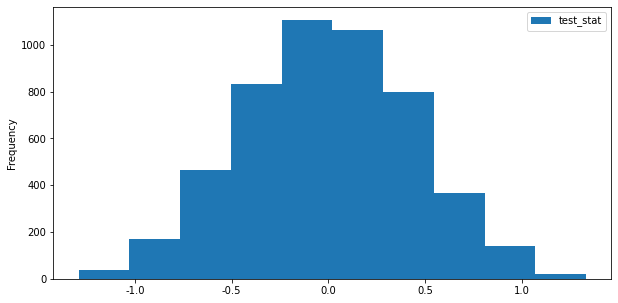

In [37]:
test_stat_permuted.plot.hist()

## 3. 가설검정에서의 오류

은하계의 A 행성에서는 범죄를 인공지능 수사관이 수사하여 피의자에 대한 범죄 증거를 점수로 나타낸다.

범죄에 대한 증거 점수 $X$ 는 점수가 높을수록 범죄를 저지른 증거가 많다는 것을 의미한다. 

A 행성의 검사는 지금까지의 모든 재판 기록을 분석하여 다음과 같은 사실이 알아내었다.

- 범죄를 실제로 저지르지 않은 피의자의 증거 점수 $X$는 평균이 100점, 표준편차가 20점인 정규분포를 따른다.

$$ \text{피의자가 범죄자가 아닌 경우} \quad X \sim N(100,20^2)  $$

- 범죄를 실제로 저지른 피의자의 증거 점수 $X$는 평균이 150점, 표준편차가 20점인 정규분포를 따른다.

$$ \text{피의자가 실제로 범죄자인 경우} \quad X \sim N(150,20^2)  $$


A 행성의 재판관은 최고의 인공지능을 가진 로봇이며 피의자의 증거 점수 X 가 132.89 점 이상이면 유죄로 판결한다. 또한 증거 점수 X 가 132.89 점 미만이면 무죄로 판결한다.

실제 범죄를 저지르지 않은 피의자가 유죄 판결을 받을 확률은 얼마인가?

모의실험을 통해서 확률을 근사적으로 구해보자. 다음 파이썬 코드는 범죄를 저지르지 않은 피의자가 유죄 판결을 받는 오류의 확률 `p_error_0`를 구하는 파이썬 코드이다.  


In [38]:
B = 100000
crime_scores_0 = np.random.normal(100, 20, size=B )

p_error_0 = np.sum(crime_scores_0 >= 132.89)/B
p_error_0

0.05074

참고로 평균이 `m` 이고 표준편차가 `sd` 인 정규분포에서 B 개의 확률변수를 임의로 추출하는 함수는 
다음과 같다.

```
np.random.normal(m, sd, size=B )
```


**문제 1**

행성 A 에서 실제 범죄자가 무죄를 선고받는 오류의 확률 `p_error_1` 을 모의실험으로  구하는 파이썬 코드를 작성하고 그 확률을 구하시오.

In [39]:
B = 100000
crime_scores_1 = np.random.normal(150, 20, size=B )

p_error_1 = np.sum(crime_scores_1 < 132.89)/B
p_error_1 

0.19314

**문제 2**

인공지능 재판관이 유무죄를 판단하는 점수의 커트라인을 140점으로 높이면 다음과 같은 오류의 확률은 어떻게 변하는가? 파이썬 코드를 이용하여 모의실험으로 구하시오. 

- 범죄를 저지르지 않은 피의자가 유죄 판결을 받는 오류의 확률 `p_error_0`
- 실제 범죄자가 무죄를 선고받는 오류의 확률 `p_error_1`

In [40]:
B = 100000
crime_scores_0 = np.random.normal(100, 20, size=B)

p_error_0 = np.sum(crime_scores_0 >= 140)/B
p_error_0

0.02327

In [41]:
B = 100000
crime_scores_1 = np.random.normal(150, 20, size=B)

p_error_1 = np.sum(crime_scores_1 < 140)/B
p_error_1

0.3107

**문제 3**

인공지능 재판관이 유무죄를 판단하는 점수의 커트라인을 120점으로 낮추면 다음과 같은 오류의 확률은 어떻게 변하는가? 파이썬 코드를 이용하여 모의실험으로 구하시오. 

- 범죄를 저지르지 않은 피의자가 유죄 판결을 받는 오류의 확률 `p_error_0`
- 실제 범죄자가 무죄를 선고받는 오류의 확률 `p_error_1`

In [42]:
B = 100000
crime_scores_0 = np.random.normal(100, 20, size=B)

p_error_0 = np.sum(crime_scores_0 >= 120)/B
p_error_0

0.15731

In [43]:
B = 100000
crime_scores_1 = np.random.normal(150, 20, size=B)

p_error_1 = np.sum(crime_scores_1 < 120)/B
p_error_1

0.06752

**문제 4**

여러분은 다음 두 개의 오류 중에 어떤 오류의 가능성이 더 작아야 된다고 생각하는가? 그 이유를 간략하게 설명하시오.

- 범죄를 저지르지 않은 피의자가 유죄 판결을 받는 오류
- 실제 범죄자가 무죄를 선고받는 오류

문제 4 답안:

제1종 오류는 귀무가설이 참임에도 불구하고 귀무가설을 기각하는 오류로 통계학적으로 제1 종오류가 더 심각하기 때문에
여기서는 제1종오류에 해당하는 범죄를 저지르지 않은 피의자가 유죄 판결을 받는 오류가 더 작아야 한다고 생각한다.

실제로도 범죄를 저지르지 않은 사람이 범죄자 보다 많을 텐데 이와 같은 경우 이 사람들이 범죄자가 될 확률이 높아지기 때문이다.